<a href="https://colab.research.google.com/github/lnikam1811/Learning_PyTorch/blob/master/01_PyTorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow Fundamentals

In [1]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "Saving and loading a model",
    6: "putting it all together"
}

In [35]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'1.13.0+cu116'

# Data (preparing and loading)

Machine learning is a game of two parts:

1. Turn your data, whatever it is, into numbers (a representation).

2. Pick or build a model to learn the representation as best as possible.

In [12]:
# create known parameters
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

len(X), X[:10], y[:10]

(50, tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

**Split data into `training` and `test` sets and if required `validation set`**

In [11]:
# create train/test split

train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [19]:
# create a function to visulize it

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

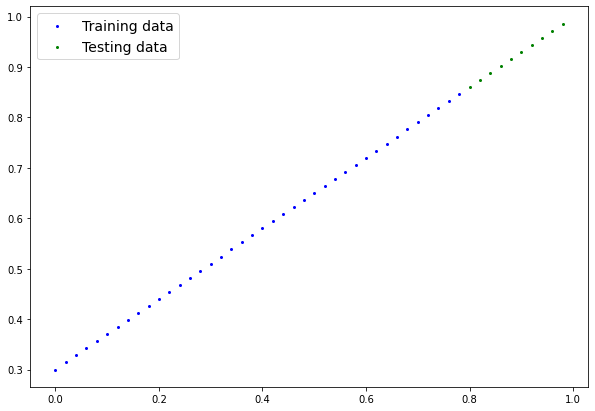

In [20]:
plot_predictions();

# Build model

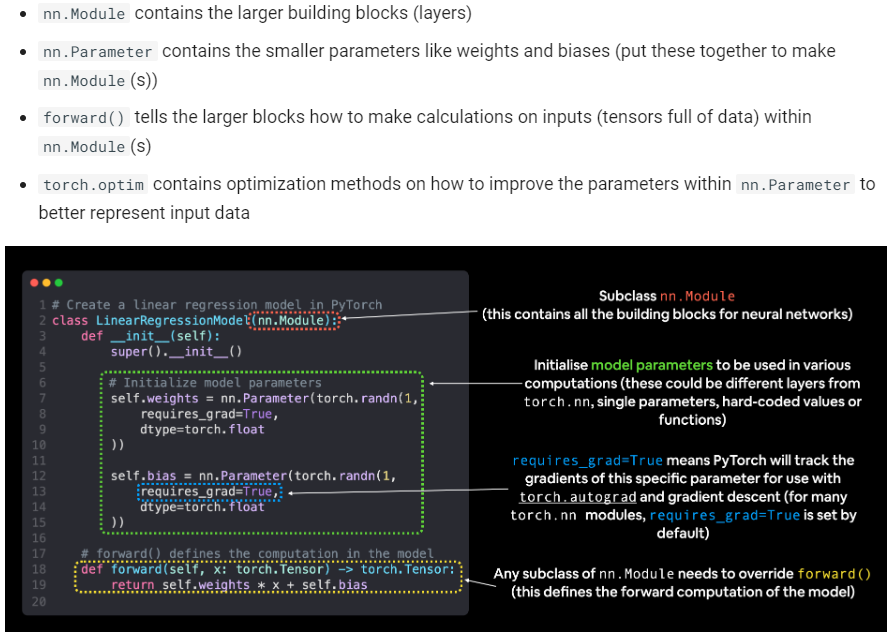

In [44]:
#  Create a Linear Regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
      super().__init__()

      # Intialize model parameters
      self.weights = nn.Parameter(torch.randn(1, dtype = torch.float), 
                                            requires_grad = True) 
                                   
      self.bias = nn.Parameter(torch.randn(1, dtype = torch.float),
                             requires_grad = True)
    
    # Forward defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias

In [45]:
# Checking the contents of a PyTorch model

# Set the manual seed since nn.Parameter are randomly intialized
torch.manual_seed(42)

# Create a instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

#  Check the nn.Parameter(s) within the nn.Module subclass we  created
list(model_0.parameters()), model_0.state_dict()

([Parameter containing:
  tensor([0.3367], requires_grad=True), Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

# Making predictions using `torch.inference_mode()`

In [46]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# Check the predictions:
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of testing samples: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of testing samples: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


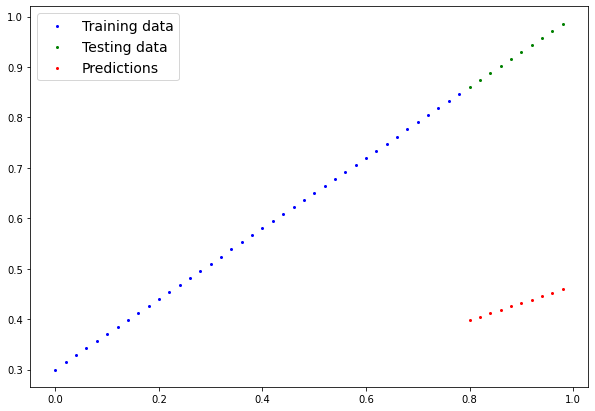

In [47]:
#  lets visualize
plot_predictions(predictions = y_preds)

In [48]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

# Train model
creating a loss function and optimizer in PyTorch

For our problem, since we're predicting a number, let's use MAE Mean absolute error (which is under `torch.nn.L1Loss()`) in PyTorch as our loss function.

And we'll use SGD, `torch.optim.SGD(params, lr)` where:

`params` is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).

`lr` is the learning rate you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a hyperparameter (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called learning rate scheduling).



In [ ]:
#  Create the loss function
loss_fn = nn.L1Loss()

# Create thet optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)